In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read input marks as CSV file

In [2]:
marks = pd.read_csv('marksRTS.csv', delimiter = ",")

In [3]:
marks.head(10)

,Roll,Mid,End
0,Other,7,11
1,CO/03,19,43
2,CO/05,17,29
3,CO/06,21,37
4,CO/08,21,37
5,CO/09,19,27
6,CO/11,14,23
7,CO/13,19,34
8,CO/14,13,15
9,CO/16,18,31


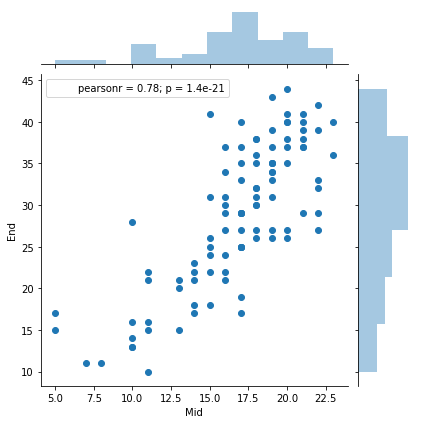

In [4]:
sns.jointplot(x = 'Mid', y = 'End', data = marks)

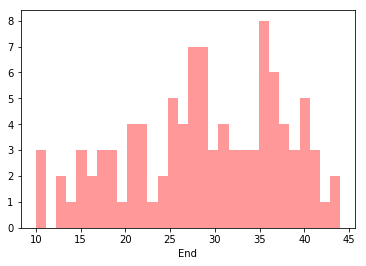

In [5]:
sns.distplot(marks['End'],bins=30,kde=False,color='red')

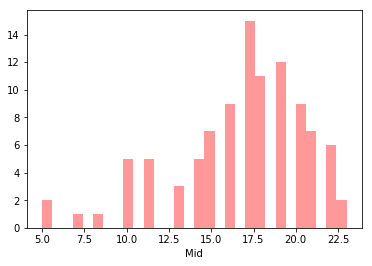

In [6]:
sns.distplot(marks['Mid'],bins=30,kde=False,color='red')

In [7]:
#Calculate total marks, Mean, Standard Deviation
marks['Total'] = marks['Mid'] + marks['End']
marks['Mean'] = np.mean(marks['Total'])
marks['SD'] = np.sqrt(np.mean(abs(marks['Total'] - marks['Mean'])**2))

#Calculate Z = (Total-Mean)/SD
marks['Z'] = ((marks['Total'] - marks['Mean'])/marks['SD'])

In [8]:
marks.head(5)

,Roll,Mid,End,Total,Mean,SD,Z
0,Other,7,11,18,45.5,11.813975,-2.327752
1,CO/03,19,43,62,45.5,11.813975,1.396651
2,CO/05,17,29,46,45.5,11.813975,0.042323
3,CO/06,21,37,58,45.5,11.813975,1.058069
4,CO/08,21,37,58,45.5,11.813975,1.058069


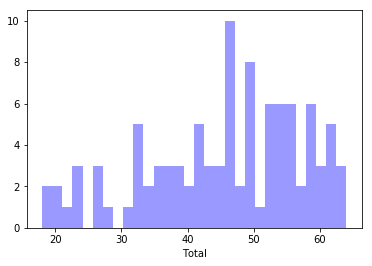

In [9]:
sns.distplot(marks['Total'],bins=30,kde=False,color='blue')

# Mapping Z-score to the grade values

In [10]:
Low_Z = [1.5, 1.0, 0.5, 0.0 , -0.5, -1.0, -1.5, -100]
Upp_Z = [100, 1.5, 1.0, 0.5, 0.0, -0.5, -1.0, -1.5]
Grade = [10, 9, 8, 7, 6, 5, 4, 0]

Points = []

for index, row in marks.iterrows():
    for i in xrange(0, 8):
        if row['Z'] <= Upp_Z[i] and row['Z'] > Low_Z[i]:
            Points.append(Grade[i])
            break

marks['G'] = Points
marks.to_csv('gradesRTS.csv', sep = ',', index = False)

In [11]:
marks.head(5)

,Roll,Mid,End,Total,Mean,SD,Z,G
0,Other,7,11,18,45.5,11.813975,-2.327752,0
1,CO/03,19,43,62,45.5,11.813975,1.396651,9
2,CO/05,17,29,46,45.5,11.813975,0.042323,7
3,CO/06,21,37,58,45.5,11.813975,1.058069,9
4,CO/08,21,37,58,45.5,11.813975,1.058069,9


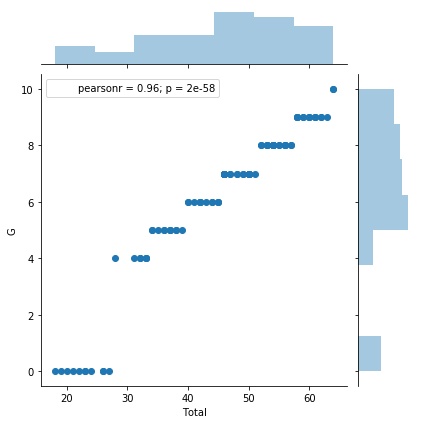

In [12]:
#Plot Grades with total marks
sns.jointplot(x = 'Total', y = 'G', data = marks)

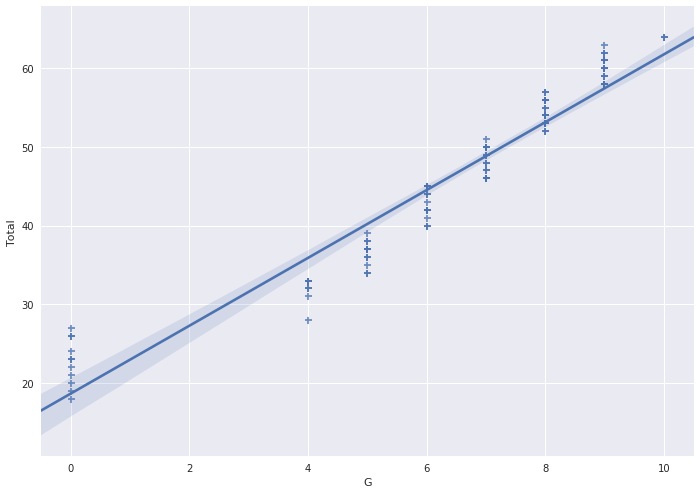

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x="G", y="Total", data=marks, marker = '+')